In [3]:
!pip install pillow==10.0.0
!pip install tensorflow scikit-learn pandas matplotlib


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [3]:
# Set your paths
train_img_path = './Downloads/archive/train'
test_img_path = './Downloads/archive/test'

train_df = pd.read_csv('./Downloads/archive/Training_set.csv')
test_df = pd.read_csv('./Downloads/archive/Testing_set.csv')

print("Training samples:", len(train_df))
print("Testing samples:", len(test_df))


Training samples: 6499
Testing samples: 2786


In [4]:
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_img_path,
    x_col='filename',
    y_col='label',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_img_path,
    x_col='filename',
    y_col='label',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │        19,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,156,747 (80.71 MB)

 Trainable params: 6,442,059 (24.57 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming img_size = 224
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │        19,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,156,747 (80.71 MB)

 Trainable params: 6,442,059 (24.57 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 895s 5s/step - accuracy: 0.0273 - loss: 17.0524 - val_accuracy: 0.0731 - val_loss: 4.1124
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1470s 9s/step - accuracy: 0.0723 - loss: 4.0697 - val_accuracy: 0.1286 - val_loss: 3.8524
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 690s 4s/step - accuracy: 0.1253 - loss: 3.8117 - val_accuracy: 0.2040 - val_loss: 3.4770
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 725s 4s/step - accuracy: 0.1864 - loss: 3.4383 - val_accuracy: 0.3025 - val_loss: 3.1537
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.2582 - loss: 3.0923 - val_accuracy: 0.3510 - val_loss: 2.8640
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.3376 - loss: 2.7045 - val_accuracy: 0.4349 - val_loss: 2.5770
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 595s 4s/step - accuracy: 0.3847 - loss: 2.4838 - val_accuracy: 0.5081 - val_loss: 2.2091
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.4314 - loss: 2.2138 - val_ac

In [15]:
model.save("butterfly_model.h5")
print("✅ Model saved as butterfly_model.h5")


✅ Model saved as butterfly_model.h5


In [17]:
from tensorflow.keras.models import load_model
model = load_model("butterfly_model.h5")


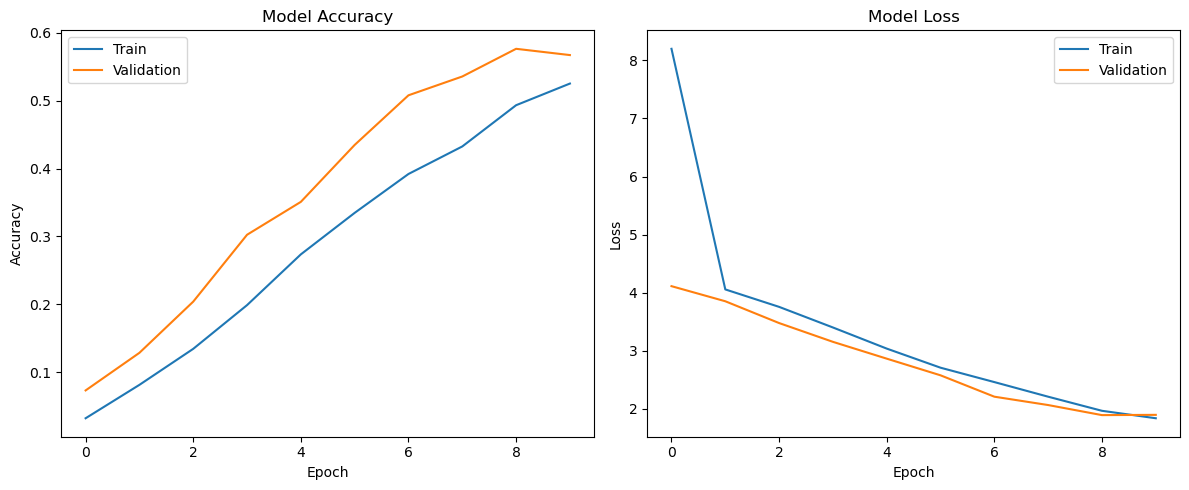

In [8]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_img_path,
    x_col='filename',
    y_col=None,
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

preds = model.predict(test_generator)
predicted_classes = np.argmax(preds, axis=1)

# Map class indices to labels
labels = train_generator.class_indices
label_map = dict((v,k) for k,v in labels.items())
predicted_labels = [label_map[k] for k in predicted_classes]

# Output
results = pd.DataFrame({
    'filename': test_df['filename'],
    'predicted_label': predicted_labels
})
print(results.head())


Found 2786 validated image filenames.
2786/2786 ━━━━━━━━━━━━━━━━━━━━ 810s 291ms/step
      filename         predicted_label
0  Image_1.jpg              PINE WHITE
1  Image_2.jpg            PAINTED LADY
2  Image_3.jpg             COPPER TAIL
3  Image_4.jpg         IPHICLUS SISTER
4  Image_5.jpg  MILBERTS TORTOISESHELL


In [10]:
# Save the predictions to a CSV file
results.to_csv("Butterfly_Test_Predictions.csv", index=False)
print("✅ Predictions saved to 'Butterfly_Test_Predictions.csv'")


✅ Predictions saved to 'Butterfly_Test_Predictions.csv'


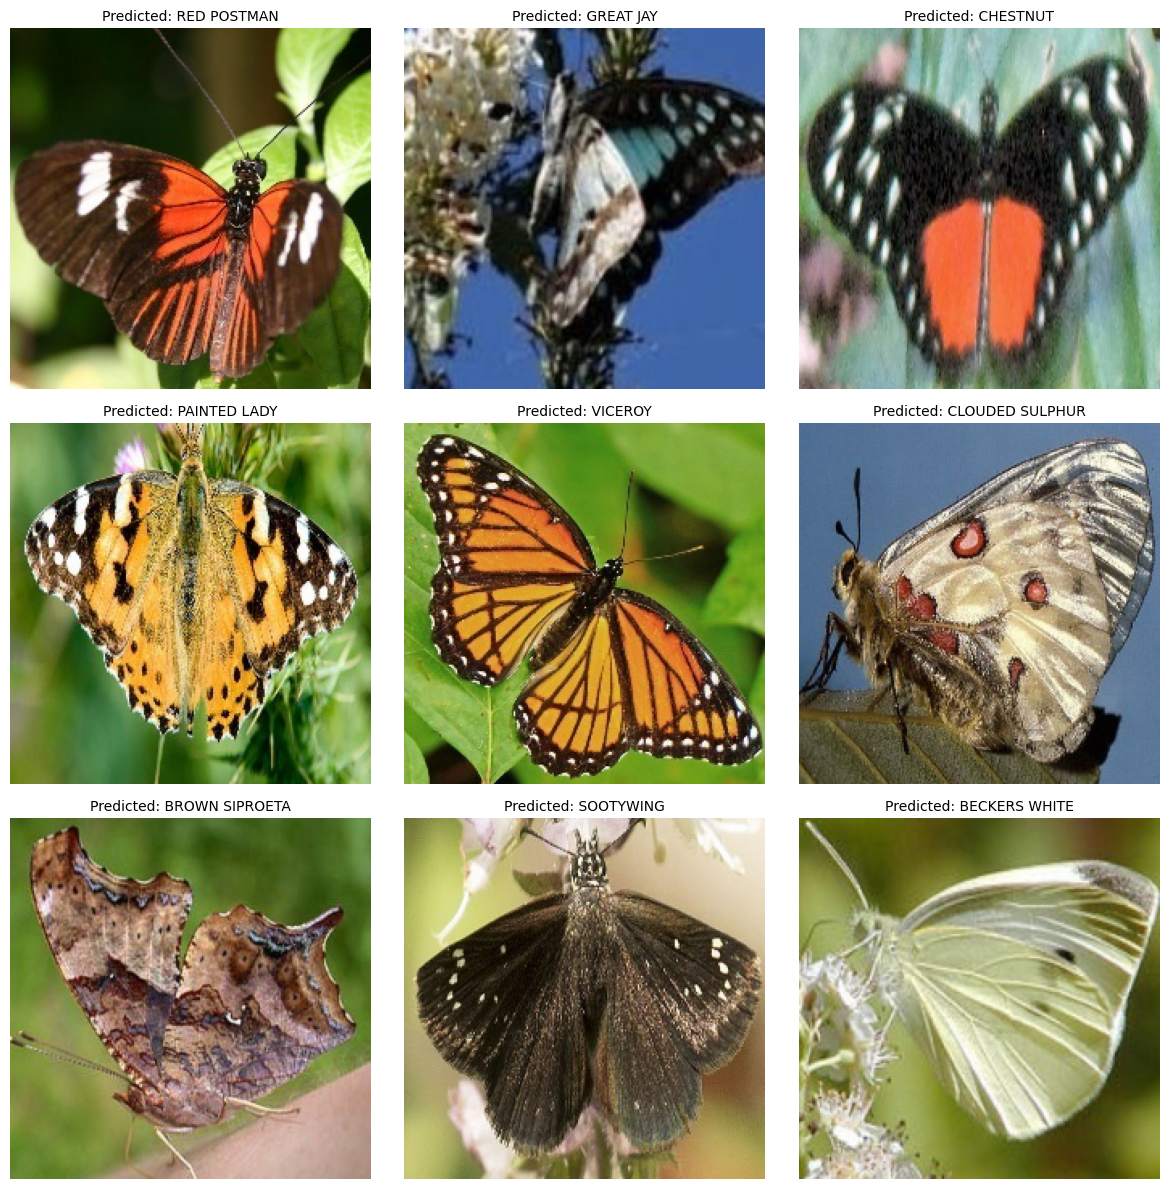

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Folder path where test images are stored
base_test_path = r"C:/Users/DELL/Downloads/archive/test"

# Take 9 random predictions to visualize
sample_df = results.sample(9).reset_index(drop=True)

plt.figure(figsize=(12, 12))

for i in range(9):
    file_name = sample_df.loc[i, 'filename']              # filename only
    pred_label = sample_df.loc[i, 'predicted_label']      # predicted label
    
    # Create full image path
    img_path = os.path.join(base_test_path, os.path.basename(file_name))
    
    # Read and display the image
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f'Predicted: {pred_label}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


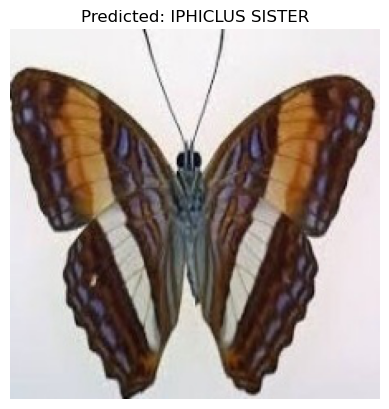

In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# === Load a new butterfly image ===
img_path = 'C:/Users/DELL/Downloads/archive/test/Image_4.jpg'  # ← change path to any image
img = image.load_img(img_path, target_size=(img_size, img_size))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict using the trained model
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
label_map = {v: k for k, v in train_generator.class_indices.items()}
predicted_label = label_map[predicted_class_index]

# Show image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
